In [2]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer, fbeta_score, f1_score

In [3]:
df = pd.read_csv('kickstarter_features_scaled.csv')

In [4]:
df.head()

,backers_count,pledged,country,created_at,deadline,goal,id,launched_date,name,spotlight,staff_pick,state,category,city,days_active,launch_month,launch_day,launch_day_name,launch_month_name,target
0,-0.153653,-0.126677,the United States,2017-06-21 17:18:54,2017-07-22 23:38:29,-0.041769,1166044523,2017-06-21 17:18:54,CrimpCoffee: Good Coffee Good Times,-1.153466,-0.389846,failed,Food,Portland,-0.361168,-0.090239,-0.353999,Wednesday,June,0
1,0.326780,0.043884,Denmark,2020-10-27 13:29:35,2020-12-11 19:58:49,-0.036475,986370978,2020-10-27 13:29:35,Spawns of the Great Rot - Printable stl 3d min...,0.866952,-0.389846,successful,Games,Svendborg,-0.260270,1.086907,-0.870301,Tuesday,October,1
2,-0.152595,-0.126035,the United Kingdom,2017-04-15 22:46:58,2017-05-17 12:59:30,-0.042177,2059825834,2017-04-15 22:46:58,Dreamcatcher Games,-1.153466,-0.389846,failed,Games,Enfield,-0.361168,-0.678812,1.194908,Saturday,April,0
3,-0.056297,-0.064278,the United States,2020-11-04 17:18:51,2021-01-04 05:30:00,-0.038511,1462846972,2020-11-04 17:18:51,Felbar's Shoppe of Curiosities and Occult for ...,0.866952,-0.389846,successful,Games,Chicago,-0.152166,1.381193,-0.353999,Wednesday,November,1
4,-0.018201,-0.021914,the United States,2020-07-20 15:40:27,2020-10-30 16:00:00,-0.034439,1635933643,2020-07-20 15:40:27,Wander: Flavorful and Functional Pantry Staples,0.866952,-0.389846,successful,Food,Brooklyn,0.150526,0.204047,-1.386603,Monday,July,1


In [5]:
def country(x):
    if x == 'the United States':
        return 'USA'
    else:
        return 'Other'

In [6]:
df['country_grouped'] = df.country.apply(country)

In [7]:
X= df[['country_grouped', 'goal', 'staff_pick', 'category', 'days_active', 'launch_month', 'launch_day']]
y = df['target']

In [8]:
X = pd.get_dummies(X, columns=['country_grouped', 'category'], drop_first=True)

In [9]:
X.head()

,goal,staff_pick,days_active,launch_month,launch_day,country_grouped_USA,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,category_Games,category_Journalism,category_Music,category_Photography,category_Publishing,category_Technology,category_Theater
0,-0.041769,-0.389846,-0.361168,-0.090239,-0.353999,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.036475,-0.389846,-0.260270,1.086907,-0.870301,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.042177,-0.389846,-0.361168,-0.678812,1.194908,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.038511,-0.389846,-0.152166,1.381193,-0.353999,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.034439,-0.389846,0.150526,0.204047,-1.386603,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
X_train.head()

,goal,staff_pick,days_active,launch_month,launch_day,country_grouped_USA,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,category_Games,category_Journalism,category_Music,category_Photography,category_Publishing,category_Technology,category_Theater
46731,-0.038059,-0.389846,-0.209822,-1.561672,1.194908,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
69429,-0.038511,-0.389846,-0.123338,0.204047,-0.870301,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
110471,-0.038511,-0.389846,1.563087,1.381193,1.194908,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
151757,0.085298,-0.389846,1.548673,-0.090239,-0.870301,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
67631,-0.042177,-0.389846,-0.353961,-0.973099,0.162303,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
lm1 = LogisticRegression()
lm1.fit(X_train[['days_active']], y_train)

LogisticRegression()

In [13]:
y_predict = lm1.predict(X_test[['days_active']]) 

In [14]:
precision_score(y_test,y_predict)

0.5676330618084143

In [15]:
recall_score(y_test, y_predict)

1.0

baseline model: 
precision score: 0.918
recall score: 0.794

In [16]:
confusion_matrix(y_test, y_predict)

array([[    0, 14809],
       [    0, 19442]], dtype=int64)

In [17]:
fbeta_score(y_test, y_predict, beta=0.5)

0.6213645602955652

In [18]:
# adding other features

In [19]:
lm2 = LogisticRegression()
lm2.fit(X_train[['goal', 'staff_pick']], y_train)

LogisticRegression()

In [20]:
y2_predict = lm2.predict(X_test[['goal', 'staff_pick']]) 

In [21]:
print("Precision: {:6.4f},   Recall: {:6.4f}, F-beta score: {:6.4f}".format(precision_score(y_test, y2_predict), 
                                                     recall_score(y_test, y2_predict), fbeta_score(y_test, y2_predict, beta=0.5)))

Precision: 0.6088,   Recall: 0.9742, F-beta score: 0.6582


In [22]:
lm3 = LogisticRegression()
lm3.fit(X_train[['goal', 'staff_pick', 'days_active', 'launch_day', 'launch_month']], y_train)
y3_predict = lm3.predict(X_test[['goal', 'staff_pick','days_active', 'launch_day', 'launch_month']]) 

In [23]:
print("Precision: {:6.4f},   Recall: {:6.4f}, Fbeta: {:6.4f}".format(precision_score(y_test, y3_predict), 
                                                     recall_score(y_test, y3_predict), fbeta_score(y_test, y3_predict, beta=0.5)))

Precision: 0.6121,   Recall: 0.9664, Fbeta: 0.6605


In [24]:
lm4 = LogisticRegression()
lm4.fit(X_train, y_train)


LogisticRegression()

In [25]:
y4_predict = lm4.predict(X_test) 

In [26]:
print("Precision: {:6.4f},   Recall: {:6.4f}, F-beta_score: {:6.4f}".format(precision_score(y_test, y4_predict), 
                                                     recall_score(y_test, y4_predict), fbeta_score(y_test, y4_predict, beta=0.5)))

Precision: 0.6691,   Recall: 0.8809, F-beta_score: 0.7029


In [27]:
pkl_filename = 'baseline_logit_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm4, file)

In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y4_predict)
cnf_matrix

array([[ 6339,  8470],
       [ 2316, 17126]], dtype=int64)

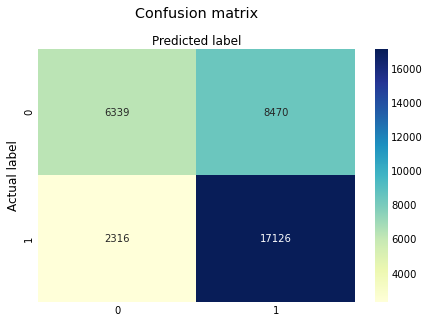

In [29]:
 # name  of classes
class_names=[0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('baseline_matrix.png', bbox_inches='tight')

In [30]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)


In [49]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, y_train)
precision = cross_val_score(lr, X, y, cv=10, scoring='precision')

In [50]:
print(np.mean(precision))

0.6720337330500437


In [51]:
recall = cross_val_score(lr, X, y, cv=10, scoring='recall')
print(np.mean(recall))

0.8803184845709067


In [52]:
from sklearn.metrics import make_scorer
fbeta = make_scorer(fbeta_score, beta=0.5)

In [53]:
fbeta_train=cross_val_score(lr, X_train, y_train, cv=10, scoring=fbeta)

In [54]:

precision_train = cross_val_score(lr, X_train, y_train, cv=10, scoring='precision')

In [55]:
recall_train= cross_val_score(lr, X_train, y_train, cv=10, scoring='recall')
print("Precision training: {:6.4f},   Recall training: {:6.4f}, Fbeta training: {:6.4f}".format(np.mean(precision_train), 
                                                     np.mean(recall_train), np.mean(fbeta_train)))

Precision training: 0.6754,   Recall training: 0.8806, Fbeta training: 0.7084


In [38]:
precision_val = cross_val_score(lr, X_val, y_val, cv=10, scoring='precision')
recall_val= cross_val_score(lr, X_val, y_val, cv=10, scoring='recall')
fbeta_val=cross_val_score(lr, X_val, y_val, cv=10, scoring=fbeta)

In [39]:
print("Precision validation: {:6.4f},   Recall validation: {:6.4f}, Fbeta validation: {:6.4f}".format(np.mean(precision_val), 
                                                     np.mean(recall_val), np.mean(fbeta_val)))

Precision validation: 0.6676,   Recall validation: 0.8748, Fbeta validation: 0.7008


In [43]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, X_val, y_val, cv=10)

In [46]:
classification_report(y_val, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.72      0.42      0.53     14742\n           1       0.67      0.87      0.76     19508\n\n    accuracy                           0.68     34250\n   macro avg       0.69      0.65      0.65     34250\nweighted avg       0.69      0.68      0.66     34250\n'

In [75]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (lr.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['failed', 'successful'],
           yticklabels=['failed', 'successful']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('Logistic Regression')

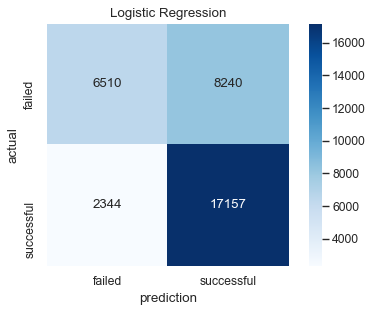

In [76]:
make_confusion_matrix(lr)

In [72]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lr, threshold), threshold=(0.0,1.0,0.01))


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

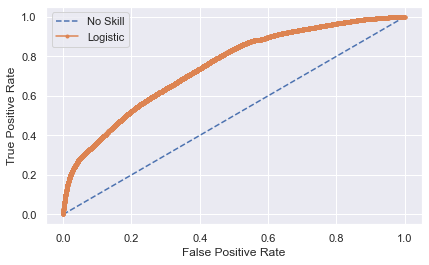

In [65]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [71]:
# calculate the g-mean for each threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))


Best Threshold=0.553994


In [77]:
def make_confusion_matrix(model, threshold=0.55):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (lr.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['failed', 'successful'],
           yticklabels=['failed', 'successful']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('Logistic Regression')
    

<Figure size 432x288 with 0 Axes>

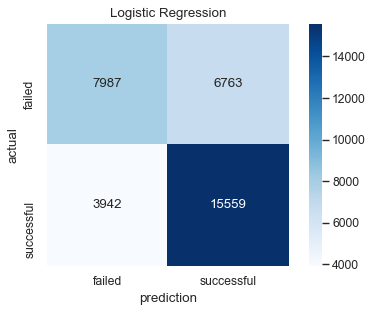

In [80]:
make_confusion_matrix(lr)
plt.savefig('logistics_matrix.png', bbox_inches='tight')